In [90]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [91]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv')
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [92]:
df.isnull().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

In [93]:
#we have 1 categorical column called car model, that we will:-
#1).convert into new numerical columns using pandas (get_dummies method) keeping dummy trap in mind
#2).convert this column into numerical column by using label encoding class from preprocessing lib of sklearn and than 
#   converting it into our new numerical colums by using one hot encoding from from preprocessing lib of sklearn

In [94]:
cm = pd.get_dummies(df['Car Model'])
new_df = pd.concat([df,cm],axis='columns')
final_df = new_df.drop(['Car Model','BMW X5'],axis='columns')
final_df

,Mileage,Sell Price($),Age(yrs),Audi A5,Mercedez Benz C class
0,69000,18000,6,0,0
1,35000,34000,3,0,0
2,57000,26100,5,0,0
3,22500,40000,2,0,0
4,46000,31500,4,0,0
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,1


In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [96]:
X = final_df.drop(['Sell Price($)'],axis='columns')
X

,Mileage,Age(yrs),Audi A5,Mercedez Benz C class
0,69000,6,0,0
1,35000,3,0,0
2,57000,5,0,0
3,22500,2,0,0
4,46000,4,0,0
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,1


In [97]:
y = final_df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [98]:
model.fit(X,y)

LinearRegression()

In [99]:
model.predict([[45000,4,0,1]])

array([36991.31721031])

In [100]:
model.score(X,y)

0.9417050937281082

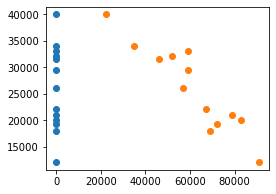

In [109]:
plt.figure(figsize=(4, 3))
ax = plt.axes()
plt_age = ax.scatter(X['Age(yrs)'], y)
plt_mileage = ax.scatter(X['Mileage'], y)
ax.axis('tight')
plt.show()


